## MNIST dataset

In [65]:
from sklearn import decomposition
pca = decomposition.PCA()

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
D=pd.read_csv('MNIST_train.csv')

In [68]:
print(D.shape)

(42000, 785)


In [69]:
print(D.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [70]:
Dy=D['label']

In [71]:
print(Dy.shape)

(42000,)


In [72]:
print(Dy.head())

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


In [73]:
Dx=D.drop('label', axis=1)

In [74]:
print(Dx.shape)

(42000, 784)


In [75]:
print(Dx.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [76]:
# Display a number

row=int(input('Enter a row number: '))

# Reshape from 1D to 2D
grid_data=Dx.iloc[row].values.reshape(28,28)

Enter a row number: 39481


In [77]:
print(grid_data)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 110 253 170 253 253 211 109 109 110 109 129 253 255
  253 253 253 192 191  94   0   0   0   0]
 [  0   0   0   0   0 109 252 252 252 252 252 252 252 253 252 25

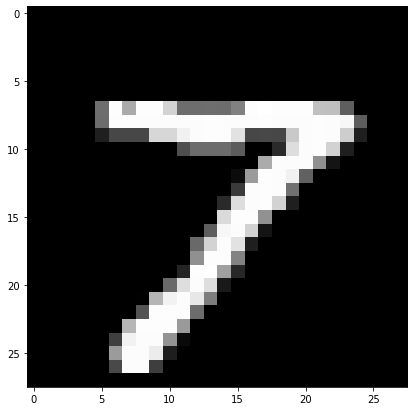

7


In [78]:
plt.figure(figsize=(7,7))
plt.imshow(grid_data, cmap='gray')
plt.show()
print(Dy[row])

## PCA using scikit-learn

In [79]:
# Data pre-processing: Standardization of data

from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(Dx)

In [80]:
print(standardized_data.shape)

(42000, 784)


In [81]:
#initializing the pca
from sklearn import decomposition
pca=decomposition.PCA()

In [82]:
pca.n_components=2
pca_data=pca.fit_transform(standardized_data)

In [83]:
print(pca_data.shape)

(42000, 2)


In [84]:
print(pca_data)

[[-5.14044388 -5.22510596]
 [19.29231463  6.03239187]
 [-7.64452857 -1.70644735]
 ...
 [ 0.4953927   7.07618744]
 [ 2.30722557 -4.34527598]
 [-4.8076432   1.55928274]]


In [85]:
# Attaching the labels to the data

new_coordinates=np.vstack((pca_data.T, Dy)).T

In [86]:
print(new_coordinates.shape)

(42000, 3)


In [87]:
# Creating a pandas dataframe

df=pd.DataFrame(new_coordinates, columns=('1st Principle Component', '2nd Principle Component', 'label'))

In [88]:
print(df.head())

   1st Principle Component  2nd Principle Component  label
0                -5.140444                -5.225106    1.0
1                19.292315                 6.032392    0.0
2                -7.644529                -1.706447    1.0
3                -0.474198                 5.835722    4.0
4                26.559572                 6.024617    0.0


In [89]:
import seaborn as sns

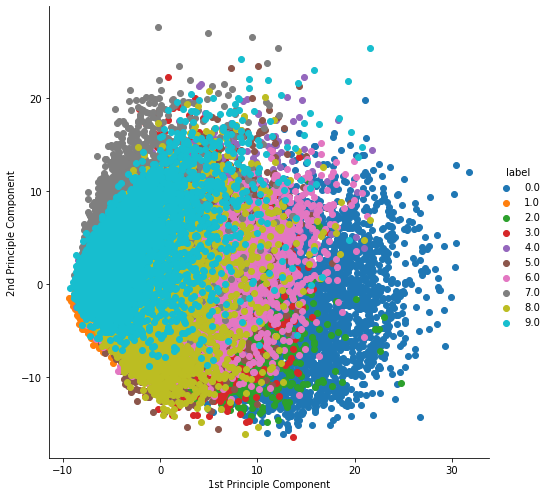

In [90]:
sns.FacetGrid(df, hue='label', height=7).map(plt.scatter, '1st Principle Component', '2nd Principle Component').add_legend()
plt.show()